In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# How the Logistic Regression Algorithm Works
Logistic Regression models the likelihood that an instance will belong to a particular class. It uses a linear equation to combine the input information and the sigmoid function to restrict predictions between 0 and 1. Gradient descent and other techniques are used to optimize the model’s coefficients to minimize the log loss. These coefficients produce the resulting decision boundary, which divides instances into two classes. When it comes to binary classification, logistic regression is the best choice because it is easy to understand, straightforward, and useful in a variety of settings. Generalization can be improved by using regularization.

Key Concepts of Logistic Regression
Important key concepts in logistic regression include:

**Sigmoid Function:** The main function that ensures outputs are between 0 and 1 by converting a linear combination of input data into probabilities.

**Decision Boundary:** The surface or line used to divide instances into several classes according to the determined probability.
Probability Threshold: a number (usually 0.5) that is used to calculate the class assignment using the probabilities that are anticipated.
Odds Ratio: The likelihood that an event will occur as opposed to not, which sheds light on how characteristics and the target variable are related.
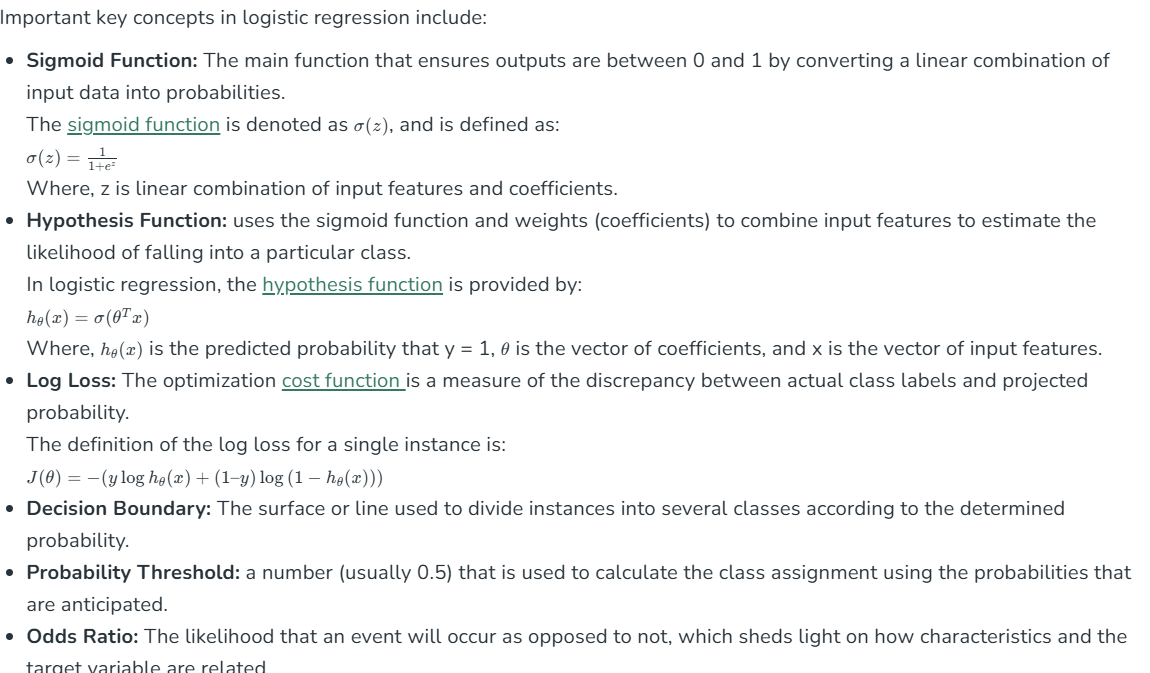

**Implementation of Logistic Regression using Python**

In [57]:
 
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

**Read and Explore the data**

In [58]:
# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
 
# Convert the target variable to binary (1 for diabetes, 0 for no diabetes)
print("Median of target feature",np.median(y))
print("mean of target feature",np.mean(y))
y_binary = (y > np.median(y)).astype(int)



Median of target feature 140.5
mean of target feature 152.13348416289594


**Observation:**

This code loads the diabetes dataset using the load_diabetes function from scikit-learn, passing in feature data X and target values y. Then, it converts the binary representation of the continuous target variable y. A patient’s diabetes measure is classified as 1 (indicating diabetes) if it is higher than the median value, and as 0 (showing no diabetes).

In [59]:
print("data_size",X.shape)
print("target_data_size",y.shape)

data_size (442, 10)
target_data_size (442,)


In [60]:
print("type of x",type(X))
print("X_valye_",X)
print("type of y",type(y))
print("y_value",y)

type of x <class 'numpy.ndarray'>
X_valye_ [[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
type of y <class 'numpy.ndarray'>
y_value [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 21

In [61]:
import pandas as pd
dataset = pd.DataFrame(X)
dataset.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [62]:
target1 = pd.DataFrame(y)
target1.head()

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


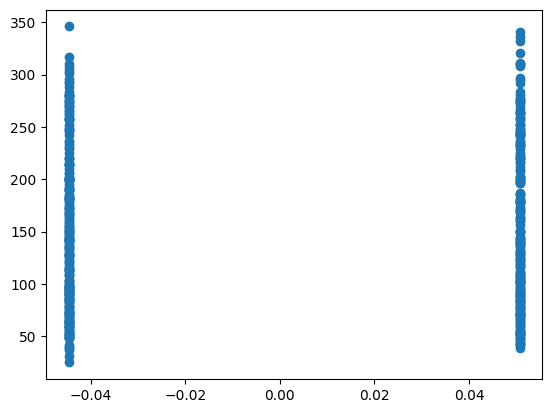

In [63]:
plt.scatter(x = dataset[1],y = target1)

**Splitting The Dataset: Train and Test dataset**


Splitting the dataset to train and test. 80% of data is used for training the model and 20% of it is used to test the performance of our model.  

**Feature Scaling**

In [64]:
 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42)

**Observation:**

This code divides the diabetes dataset into training and testing sets using the train_test_split function from scikit-learn: The binary target variable is called y_binary, and the characteristics are contained in X. The data is divided into testing (X_test, y_test) and training (X_train, y_train) sets. Twenty percent of the data will be used for testing, according to the setting test_size=0.2. By employing a fixed seed for randomization throughout the split, random_state=42 guarantees reproducibility.

**Train The Model**

Using Default Parameter Logistic Regression

In [65]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
 
# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(
    penalty='elasticnet',
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='saga',  # Change the solver to 'saga'
    max_iter=1000,
    multi_class='auto',  # 'deprecated' is not valid, use 'auto' or 'ovr'/'multinomial'
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=0.5  # l1_ratio must be set for elasticnet
)

model1.fit(X_train, y_train)


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(l1_ratio=0.5, max_iter=1000, multi_class='auto',
                   penalty='elasticnet', solver='saga')

**Observation:**

 Using scikit-learn’s LogisticRegression, this code trains a logistic regression model:

It establishes a logistic regression model instance.Then, itemploys the fit approach to train the model using the binary target values (y_train) and standardized training data (X_train). Following execution, the model object may now be used to forecast new data using the patterns it has learnt from the training set.

**Evaluation Metrics**


Metrics are used to check the model performance on predicted values and actual values. 

In [72]:
 
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

#Evaluate the model1
y_pred1 =model.predict(X_test)
accuracy1 =accuracy_score(y_test,y_pred)
print("Accuracy_model1: {:.2f}%".format(accuracy1 * 100))

Accuracy: 73.03%
Accuracy_model1: 73.03%


**Observation:**

This code predicts the target variable and computes its accuracy in order to assess the logistic regression model on the test set. The accuracy_score function is then used to compare the predicted values in the y_pred array with the actual target values (y_test).

**Confusion Matrix and Classification Report**

In [75]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("confusion matrices for model1")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("\nClassification Report:\n", classification_report(y_test, y_pred1))

Confusion Matrix:
 [[36 13]
 [11 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        49
           1       0.69      0.72      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89

confusion matrices for model1
Confusion Matrix:
 [[36 13]
 [11 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        49
           1       0.69      0.72      0.71        40

    accuracy                           0.73        89
   macro avg       0.73      0.73      0.73        89
weighted avg       0.73      0.73      0.73        89



**Visualizing the performance of our model.**

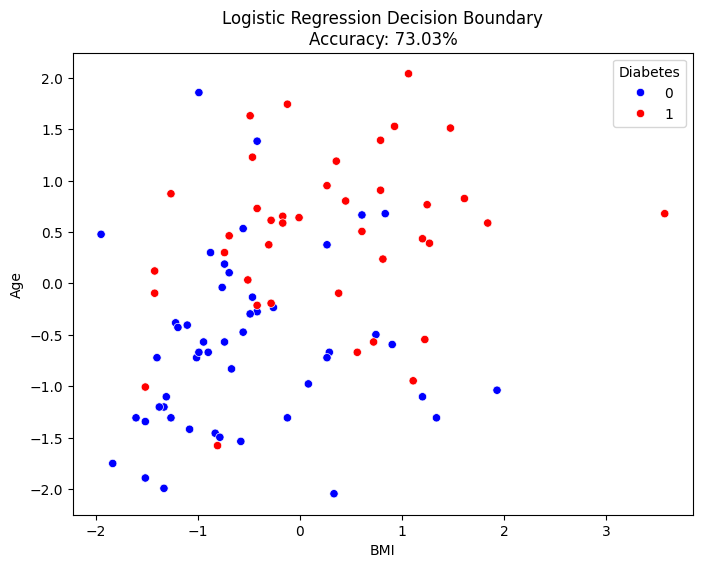

In [76]:
 
# Visualize the decision boundary with accuracy information
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 2], y=X_test[:, 8], hue=y_test, palette={
                0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(
    accuracy * 100))
plt.legend(title="Diabetes", loc="upper right")
plt.show()

**Observation:**

To see a logistic regression model’s decision border, this code creates a scatter plot. An individual from the test set is represented by each point on the plot, which has age on the Y-axis and BMI on the X-axis. The points are color-coded according to the actual status of diabetes, making it easier to evaluate how well the model differentiates between those with and without the disease. An instant visual context for the model’s performance on the test data is provided by the plot’s title, which includes the accuracy information. The inscription located in the upper right corner denotes the colors that represent diabetes (1) and no diabetes (0).

**Plotting ROC Curve**

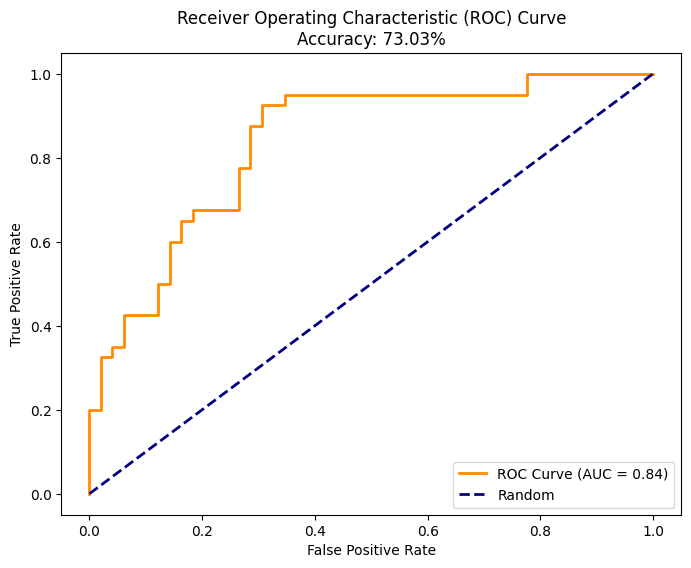

In [77]:
   
# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    accuracy * 100))
plt.legend(loc="lower right")
plt.show()

**Observation:**

For the logistic regression model, this code creates and presents the Receiver Operating Characteristic (ROC) curve. The true positive rate (sensitivity) and false positive rate at different threshold values are determined using the probability estimates for positive outcomes (y_prob), which are obtained using the predict_proba method. Use of the roc_auc_score yields the area under the ROC curve (AUC). An illustration of the resulting curve is provided, and the legend shows the AUC value. The ROC curve for a random classifier is shown by the dotted line.